In [1]:
print('Lecture-19')

Lecture-19


## SINIF İSİMLERİ

Yorumlayıcı bir sınıf tanımlamasını gördüğünde type isimli sınıf türünden bir nesne yaratır. Sınıfın elemanlarını bu sınıf nesnesinin içerisine yerleştirir. 



In [3]:
class Sample:
    def foo(self):
        print('foo')

print(type(Sample))

<class 'type'>


In [4]:
class Sample:
    def foo(self):
        print('foo')

def b(self):
    print('bar')



In [5]:
Sample.bar = b

In [6]:
s = Sample()
s.foo()

foo


In [7]:
s.bar()

bar


In [8]:
class Sample:
    def foo(self):
        print('foo')

s = Sample()
print(type(Sample))
print(type(s))

<class 'type'>
<class '__main__.Sample'>


Sınıf: Bir sınıf belli konuda birtakım işlemleri yapan bir veri yapısı olarak düşünülebilir. 

- file sınıf --> dosya işlemleri
- str sınıfı --> yazı işlemleri
- complex sınıfı --> karmaşık sayı

sınıflarda işi yapan eleman metotlardır. bu metotlar ortak birtakım değişkenleri kullanırlar. bu değişkenler nesnenin örnek öznitelikleridir. her sınıf nesnesi yaratıldığı zaman bu örnek özniteliklerde yeni birer kopya yaratılmış oluyor. böylece her nesne aynı türden yeni bir örneği (instance) temsil eder.

### Sınıflar Arasındaki İlişki

Hastane otomasyonu --> doktor sınıfı ile hastane sınıfı, doktor sınıfı ile hasta sınıfı arasında ilişkiler olacaktır.

- İçerme ilişkisi (Composition)
- Birleşme İlişkisi (Aggregation)
- Kalıtım İlişkisi (Inheritance)
- Çağrışım İlişkisi (Association)

1) İçerme ilişkisi (Composition)

Bir sınıf türünden nesne başka bir sınıf türünden nesnenin bir parçasını oluşturuyorsa bu iki sınıf arasında içerme ilişkisi vardır.
Araba ile motor sınıfları arasında, insan ile karaciğer sınıfları arasında içerme ilişkisi vardır.

1.1) İçerilen nesne tek bir nesne tarafından içerilmelidir.
1.2) İçeren nesneyle içerilen nesnenin ömürleri yaklaşık aynı olmalıdır.

Oda ile duvar sınıfları arasında içerme ilişkisi yoktur. Satranç tahtası ile tahtanın kareleri arasında içerme ilişkisi vardır. UML
İçerme ilişkisi -> has, have

In [9]:
# B sınıfı ile A sınıfı arasında içerme ilişkisi olsun. A sınıfı türünden bir nesnenin B sınıfı türünden bir nesnenin
# parçasını oluşturduğunu düşünelim.

class A:
    pass

class B:
    def __init__(self):
        self.a = A()
        pass

b = B()

In [10]:
class Square:
    pass

class Board:
    def __init__(self):
        self.squares = [[Square()] * 8 for i in range(8)]

board = Board()

In [11]:
board

2) Birleşme İlişkisi (Aggregation): Bir sınıf nesnesi başka türden bir sınıf nesnesini bünyesini katarak kullanmaktadır. Fakat kullanan nesne ile kullanılan nesnenin ömürleri aynı olmak zorunda değildir. Kullanılan nesne başka nesneler tarafından da kullanılıyor olabilir.
Araba sınıfı ile tekerlek sınıfı arasında, bilgisayar sınıfı ile fare sınıfı arasında, oda sınıfıyla duvar sınıfı arasında, ağaç sınıfıyla yaprak sınıfı arasında, hastane sınıfıyla doktor sınıfı arasında böyle bir ilişki vardır. 

tahta board sınıfı ile tahtanın üzerindeki kareler de square sınıfı ile temsil edilsin. board sınıfı ile square sınıfı arasında içerme ilişkisi vardır. tahta üzerindeki taşlar da figure sınıfıyla temsil ediliyor olsun. bu durumda square sınıfı ile figure sınıfı arasında da birleşme ilişkisi söz konusu.

Python'da birleşme ilişkisi sınıfın örnek özniteliğine nesne yaratılırken ya da yaratıldıktan sonra bir nesnenin atanması yoluyla gerçekleştirilmektedir.

In [12]:
class A:
    pass

class B:
    def __init__(self, a = None):
        self.a = a
        pass

    def seta(self, a):
        self.a = a

a = A()

b1 = B()
b2 = B()

b1.seta(a)
b2.seta(a)

In [13]:
b1.a

In [14]:
b2.a

In [15]:
class Doctor:
    def __init__(self, name, specialty):
        self.name = name
        self.specialty = specialty

    def disp(self):
        print(f'{self.name}, {self.specialty}')

class Hospital:
    def __init__(self):
        self.doctors = []
    
    def add_doctor(self, doctor):
        self.doctors.append(doctor)
    
    def disp(self):
        for doctor in self.doctors:
            doctor.disp()

hospital = Hospital()

doctor1 = Doctor('Beyza Aldanmaz', 'İç hastalıkları')
doctor2 = Doctor('Oğuzhan Çağlar', 'Psikiyatri')

hospital.add_doctor(doctor1)
hospital.add_doctor(doctor2)

hospital.disp()

Beyza Aldanmaz, İç hastalıkları
Oğuzhan Çağlar, Psikiyatri


In [16]:
# tahta ile kareler arasında içerme ilişkisi, kareler ile taşlar arasında da birleşme ilişkisi bulunmaktadır.

class Figure:
    def __init__(self, ftype, color):
        self.ftype = ftype
        self.color = color

class Square:
    def __init__(self, color):
        self.color = color
        self.figure = None
    
    def set_figure(self, figure):
        self.figure = figure
    
    def get_figure(self):
        return self.figure

class Board:
    def __init__(self):
        self.squares = [[Square('Beyaz' if (i + k) % 2 == 0 else 'Siyah') for i in range(8)] for k in range(8)]
        self.squares[0][0].figure = Figure('Kale', 'Siyah')
        self.squares[0][1].figure = Figure('At', 'Siyah')
        # ...

3) Kalıtım (Türetme) İlişkisi (Inheritance)

Türetme: mevcut bir sınıfa ona dokunmadan ekleme yapmak anlamına gelmektedir. Elimizde A sınıfı bulunuyor olsun. Biz buna birtakım elemanlar eklemek isteyelim. Fakat A'nın kaynak kodu elimizde olmayabilir ya da onu bozmak istemeyebiliriz. Bu durumda A sınıfından bir B sınıfı türetiriz. Eklemeleri B'ye yaparız. Böylece B sınıfı hem A sınıfı gibi kullanılır hem de fazlalıklara sahip olur.

base class (taban sınıf, asıl sınıf). derived class(türemiş sınıf).

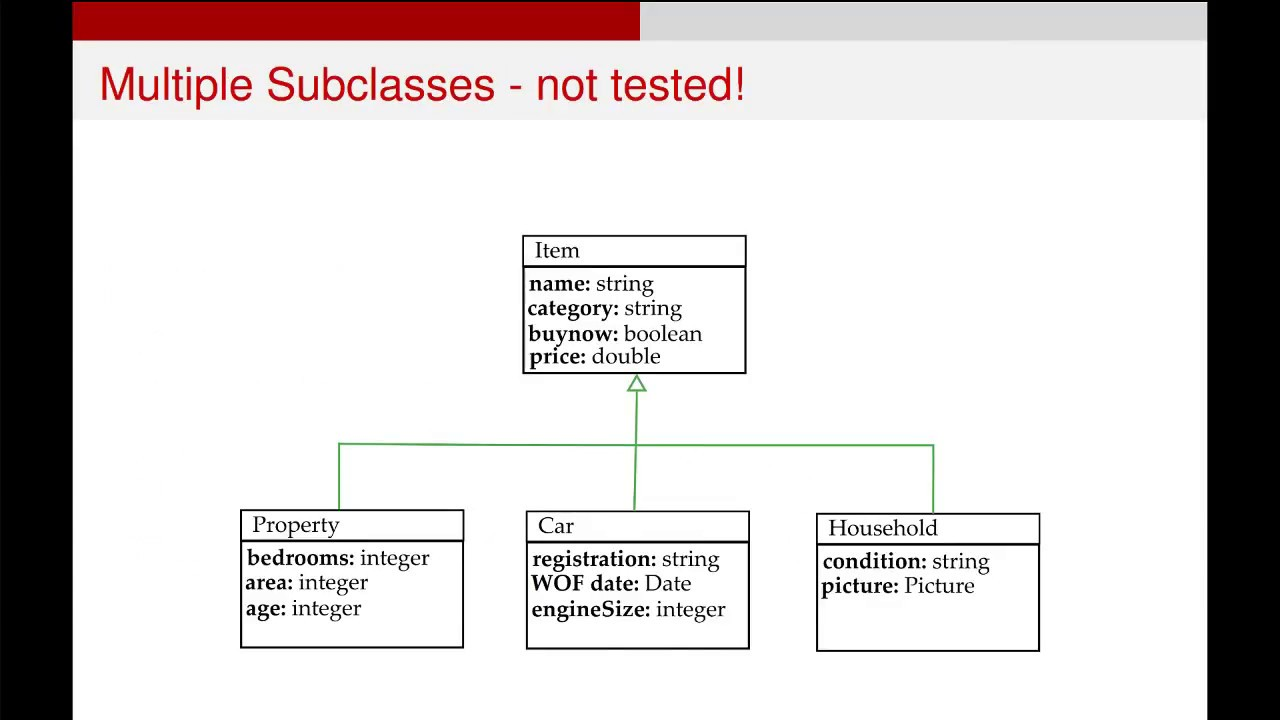

Türemiş bir sınıftan yeniden türetme yapılabilir mi? Evet.

Örnek: tüm taşıtların ortak bir takım özellikleri Taşıt sınıfında toplanabilir. (plakası, motor gücü vs.). Bundan Otomobil, kamyon, motosiklet gibi sınıflar türetilebilir. otomobil de bir taşıt, kamyon da, motosiklet de. fakat kamyonda olan özellikler otomobilde olmayabilir.

Türetmeye Neden gereksinim duyulmaktadır? Programlamadaki temel prensiplerden biri kod ve veri tekrarını engellemektedir. İşte NYPT'de iki sınıfın içerisinde ortak elemanlar varsa bunlar ortak bir taban sınıfta toplanmalı ve ondan türetme yapılarak bu iki sınıf oluşturulmalıdır. GUI.

Bir sınıfın birden fazla taban sınıfı olması durumuna çoklu türetme (multiple inheritance). Hava taşıtları bir sınıfla, denit taşıtları başka bir sınıfla temsil edilebilir. Aircraft sınıfı bunlardan çoklu türetilebilir.

4) Çağrışım İlişkisi (Association): Bu ilişki biçiminde bir sınıf bir sınıfı bünyesine katarak değil, yüzeysel biçimde bir yada birkaç metodunda kullanıyor durumdadır. Taksi ve müşteri arasında ciddi bir ilişki yoktur. taksi müşteriyi alır ve bir yere bırakır. halbuki taksi ile soförü arasında önemli bir ilişki vardır. taksi ile müşteri ilişkisi çağrışım ilişkisi iken, taksi ile şöför arasındaki ilişki birleşme (aggregation) ilişkisidir. bunların arrasında da çağrışım ilişkisi var.

çağrışım lişkisini oluştururken kullanılan nesneyi kullanan nesnenin örnek özniteliklerinde saklamayız.

In [ ]:
class AdversitingCompany:
    pass

class Hospital:
    def advertise(self, adcompany):
        pass
    pass

# Daha detaylı diğer derste ele alalım.